# Spherical Harmonic Shape Descriptor
Eamon Whalen

In [227]:
import numpy as np
import pyvista as pv
import trimesh
from scipy.special import roots_legendre
from pyshtools.expand import SHExpandGLQ

In [201]:
# load mesh
mesh = pv.read('meshes/148.obj')

# center at origin (for now find via average node position)
cog = np.mean(mesh.points, axis=0)
mesh.points -= (cog)

# scale to unit sphere
bndSphere = np.max(np.linalg.norm(mesh.points, axis=1))
mesh.points /= bndSphere

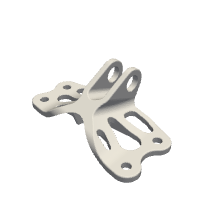

In [202]:
# visualize
plotter = pv.Plotter()
plotter.set_background('white')
plotter.add_mesh(mesh, show_edges=False, color='white')

cpos = [(-242.19, -271.14, 301.84),
         (14.08, -73.27, 31.25),
         (0.48, 0.42, 0.76)]

plotter.show(window_size=(200,200));

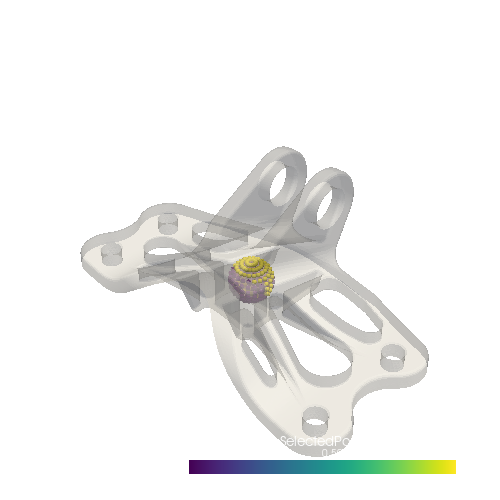

In [240]:
# get Gauss-Legendre Quadrature points
lmax = 10 # (max degree or frequency)
nodes, weights = roots_legendre(lmax+1)
thetas = np.arcsin(nodes) - np.pi/2
period = 2*lmax+1
phis = np.linspace(0, 2*np.pi, period)

# for a given radius, compute cartesian coordinates
r = 0.1
Thetas, Phis = np.meshgrid(thetas, phis)
x = r*np.sin(Thetas.flatten())*np.cos(Phis.flatten())
y = r*np.sin(Thetas.flatten())*np.sin(Phis.flatten())
z = r*np.cos(Thetas.flatten())

# determine if points are inside or outside the mesh
points = np.vstack([x,y,z]).T
pc = pv.PolyData(points)
samples = pc.select_enclosed_points(mesh, check_surface=True)['SelectedPoints']

# visualize
sp1 = pv.Sphere(radius=r)
pc = pc.select_enclosed_points(mesh)
plotter = pv.Plotter()
plotter.set_background('white')
plotter.add_mesh(sp1, show_edges=False, color='pink', opacity=0.5)
plotter.add_mesh(pc, render_points_as_spheres=True)
plotter.add_mesh(mesh, show_edges=False, color='white', opacity=0.4)
plotter.show(window_size=(500,500));

In [271]:
samples = pc.select_enclosed_points(mesh, check_surface=True)['SelectedPoints']
samples = np.reshape(samples, (lmax+1,-1))

cilm = SHExpandGLQ(samples, 
                    weights, 
                    nodes,
                    norm=2,            # apply Schmidt normalization
                    csphase=1,         # no Condon-Shortley phase factor
                    lmax_calc=lmax)
cilm

array([[[ 0.47937796,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.04361198,  0.01191538,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [ 0.340018  ,  0.09147654, -0.14683338,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [-0.04513086, -0.08304117, -0.53887496, -0.01290247,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [-0.35581296,  0.0006039 ,  0.11511227, -0.17685167,
         -0.14282304,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ],
        [-0.01509793, -0.04523737,  0.03426723, -0.02480041,
          0.08850118, -0.07462794,  0.        ,  0.        ,
          0.        ,  

In [ ]:
# voxelization(?)

# gaussian edt(?)

# choose sphere radii, for each radius, 

#    sample at legendre points
https://docs.pyvista.org/examples/01-filter/extract-cells-inside-surface.html?highlight=select_enclosed_points
#    SHT transform

# build 2D descriptor from coefficients



